# Master 2 High Performance Computing and Simulation

## Members : lougani faouzi ,hery Andrianantenaina

## Report of module Data & Apprentissage TD2




## Introduction : 

This file contains our solutions for the different exercises that we have solved.
The work of these exercises has been shared between the two members of the group, so that we can discuss the problematic and seek together the solution of each exercise.

we used a git repository to version our progress: 
https://github.com/lougani-faouzi/DA

# Exercice 1.

In Section 2.5 of the book "[The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf)", by Trevor Hastie, Robert Tibshirani, Jerome Friedman, there is a mention about the effects of the *curse of dimensionality*. Read the section and write the code implementations that reproduce and verify all the experiments shown in the Figures 2.6 to 2.9.

* Figure 2.6

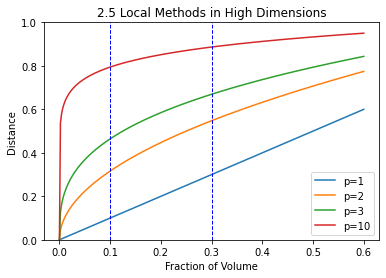

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,0.6,300)
y1 = pow(x,1)
y2 = pow(x,1/2)
y3 = pow(x,1/3)
y4 = pow(x,1/10)
plt.plot(x,y1,label="p=1")
plt.plot(x,y2,label="p=2")
plt.plot(x,y3,label="p=3")
plt.plot(x,y4,label="p=10")
plt.axvline(x=0.1,color='b',linestyle='--',lw = "1")
plt.axvline(x=0.3,color='b',linestyle='--',lw = "1")
plt.legend()
plt.ylim([0,1])
plt.ylabel("Distance")
plt.xlabel("Fraction of Volume")
plt.title("2.5 Local Methods in High Dimensions")


plt.show()

 * Figure 8

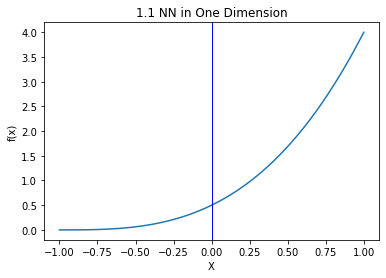

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,300)
#x=range(0,10)
#x=[-1,-0.8,-0.6,-0.4,-0.2,0]
y = 0.5*pow((x+1),3)
plt.plot(x,y)
plt.axvline(x=0,color='b',lw = "1")

plt.ylabel("f(x)")
plt.xlabel("X")
plt.title("1.1 NN in One Dimension")

plt.show()

# Exercice 2.
**a)** Compare the performance of LOOCV with 5-fold CV.

For our tests we downloaded the sonar.csv file from: https://datahub.io/machine-learning/sonar#pandas
and we save it locally on the same folder of our work


In [2]:
# a. Comparaison of LOOCV and 5-fold CV : ---------------------------------
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# load dataset
url = './sonar.csv'
dataframe = read_csv(url, skiprows=[1])
data = dataframe.values

n_samples = len(data)
#print(n_samples)
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]

# create loocv procedure
cvLOOCV = LeaveOneOut()

# create model
model = RandomForestClassifier(random_state=1)

# evaluate model
loocv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
k_foldcv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1)

# report performance
print('Perfor report  :')
print('The accuracy for LOOCV     : %.3f (%.3f)' % (mean(loocv_scores), std(loocv_scores)))
print('The accuracy for 5-fold CV : %.3f (%.3f)' % (mean(k_foldcv_scores), std(k_foldcv_scores)))

Perfor report  :
The accuracy for LOOCV     : 0.836 (0.371)
The accuracy for 5-fold CV : 0.716 (0.141)


**b)** Investigate the effect of the size of data to the comparison. Specifically run (a) with 25%, 50%, and 75% of the data.

In [3]:
# b. effect of the size data to the comparison :
n_samples = len(data)
X1, y1 = X[:int(.25 * n_samples)], y[:int(.25 * n_samples)]  # 25% 
X2, y2 = X[:int(.50 * n_samples)], y[:int(.50 * n_samples)]  # 50%
X3, y3 = X[:int(.75 * n_samples)], y[:int(.75 * n_samples)]  # 75%

# create loocv procedure
cvLOOCV = LeaveOneOut()

# create model
model = RandomForestClassifier(random_state=1)
# evaluate models across different length of data : 
# 25% of the original data : -----------------------------------------------------------------------------
loocv_scores_1 = cross_val_score(model, X1, y1, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
kfold_scores_1 = cross_val_score(model, X1, y1, scoring='accuracy', cv=5, n_jobs=-1)

# 50% of the original data : -----------------------------------------------------------------------------
loocv_scores_2 = cross_val_score(model, X2, y2, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
kfold_scores_2 = cross_val_score(model, X2, y2, scoring='accuracy', cv=5, n_jobs=-1)

# 75% of the original data : -----------------------------------------------------------------------------
loocv_scores_3 = cross_val_score(model, X3, y3, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
kfold_scores_3 = cross_val_score(model, X3, y3, scoring='accuracy', cv=5, n_jobs=-1)

# report performance
print('Perfor report  ')

print('---25% of original data -----------------------------------')
print('Accuracy for LOOCV         : %.3f (%.3f)' % (mean(loocv_scores_1), std(loocv_scores_1)))
print('Accuracy for 5-fold CV     : %.3f (%.3f)' % (mean(kfold_scores_1), std(kfold_scores_1)))

print('---50% of original data -----------------------------------')
print('Accuracy for LOOCV         : %.3f (%.3f)' % (mean(loocv_scores_2), std(loocv_scores_2)))
print('Accuracy for 5-fold CV     : %.3f (%.3f)' % (mean(kfold_scores_2), std(kfold_scores_2)))

print('---75% of original data -----------------------------------')
print('Accuracy for LOOCV         : %.3f (%.3f)' % (mean(loocv_scores_3), std(loocv_scores_3)))
print('Accuracy for 5-fold CV     : %.3f (%.3f)' % (mean(kfold_scores_3), std(kfold_scores_3)))


Perfor report  
---25% of original data -----------------------------------
Accuracy for LOOCV         : 1.000 (0.000)
Accuracy for 5-fold CV     : 1.000 (0.000)
---50% of original data -----------------------------------
Accuracy for LOOCV         : 0.932 (0.252)
Accuracy for 5-fold CV     : 0.923 (0.022)
---75% of original data -----------------------------------
Accuracy for LOOCV         : 0.852 (0.355)
Accuracy for 5-fold CV     : 0.748 (0.130)


**c)** Investigate the effect of having one small data class to the comparison. Specifically, consider that you have only a portion of the one of the classes: 25%, 50%, or 75%, and apply the training-evaluation procedure with CV.

In [18]:

from sklearn.model_selection import cross_validate

for n in (5, 10, 15, 20, 25, 30):
    
    scores = cross_validate(model, X1, y1, scoring='precision_macro', cv=n, return_estimator=True)
    sorted(scores.keys())
   
    print('----------------------------------------')
    print('score_time    for %d fold CV    : %.3f' % (n, mean(scores['score_time'])))
    print('mean fit time for %d fold CV    : %.3f' % (n, mean(scores['fit_time'])))  
print('----------------------------------------')
print('----------------------------------------')
print('Direct application:')
scores_ = cross_validate(model, X1, y1, scoring='precision_macro', cv=30, return_estimator=True)
print('score_time for 30 fold CV %.3f'  % mean(scores_['score_time']))
print('score_time for 30 fold CV %.3f'  % mean(scores_['fit_time']))


----------------------------------------
score_time    for 5 fold CV    : 0.013
mean fit time for 5 fold CV    : 0.134
----------------------------------------
score_time    for 10 fold CV    : 0.013
mean fit time for 10 fold CV    : 0.133
----------------------------------------
score_time    for 15 fold CV    : 0.013
mean fit time for 15 fold CV    : 0.133
----------------------------------------
score_time    for 20 fold CV    : 0.013
mean fit time for 20 fold CV    : 0.127
----------------------------------------
score_time    for 25 fold CV    : 0.013
mean fit time for 25 fold CV    : 0.131
----------------------------------------
score_time    for 30 fold CV    : 0.014
mean fit time for 30 fold CV    : 0.133
----------------------------------------
----------------------------------------
Direct application:
score_time for 30 fold CV 0.014
score_time for 30 fold CV 0.133


### Comments  and conclusion:
We can observe from the previous results that for the case where we have one small data set LOOCV performs well, 5-fold CV gives nearly the same performance results, but actually when we apply the CV procedure with different number of 'k' in k-fold CV we don't really see significant results : we can conclude that k-fold CV present meaningless results in this case (as we have for example score time and mean fit time remains the same for different k), in the other hand, when we fit with a larger data set the accuracy for LOOCV decreases.

To conclude, if we have a small data set we prefer LOOCV to cross-validate our model as we will get more significant performance metrics, in the other hand if we have large amount of training data, k-fold cross validation could be a better choice, because if we take LOOCV instead there will be too many iterations to perform the evaluation.

# Exercice 3

**a)** Give a meaningful definition of what an "outlier" could be in this situation. What would be the modifications needed to be done to the original density-based method in order to be relevant in this case?
   * To interpret what could be an outlier in such kind of data (time-series data), we can look for example at music recognition (or sound recognition in general) in situations when we search to identify the artist, a set of instruments, or also if we cant to remove or reduce noises in the music, in finance for example when we seek the anomalies in same transactions.., so it could represent noises, anomalies, special behavious in the dignal..
   * It could be a good idea to use the frequency-domain representation of data to simplify their analysis.


**b)** Construct a synthetic 2D signal with parametrized proportion of outliers (like the exercises we saw in Lab6) and demonstrate the application of a LOF-based solution.  
* In this application we are going to fit our model to a set of random data to detect the outliers, using LOF model which is an unsupervised model based on the measures of densities of each object with respect to their neighbors.

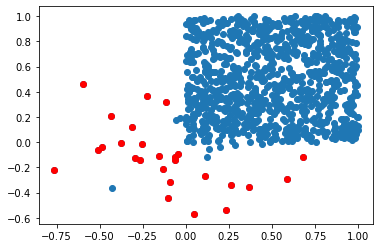

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

N_samples = 1000
N_outliers = 50

data = np.random.random((N_samples,2))
#print(data)

X, y = data[:, :-1], data[:, -1]

#print(X.type)

# Add outlier data
np.random.seed(0)
X[:N_outliers] = 0.3 * np.random.normal(size=(N_outliers, 1))
y[:N_outliers] = -0.3 * np.random.normal(size=N_outliers)


#plt.scatter(X, y, color='yellowgreen', marker='.', label='Inliers')

# model specification
model = LocalOutlierFactor(n_neighbors = 20, metric='manhattan')

# model fitting
y_pred = model.fit_predict(data)

index = np.where(y_pred == -1)
values = data[index]

#model.negative_outlier_factor_

plt.scatter(X, y)
#plt.scatter(X[:N_outliers], y[:N_outliers], color='yellow', marker='.', label='Inliers')

plt.scatter(values[:,0],values[:,1], color='r')  # Outliers
plt.show()